In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


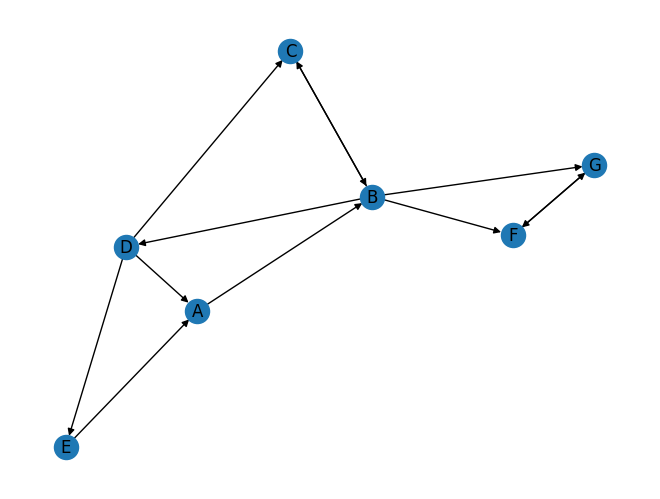

In [29]:
# Create a directed graph object
M = nx.DiGraph()
M.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
M.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("B", "F"), ("B", "G"),
                      ("C", "B"), ("D", "C"), ("D", "A"),("D", "E"), ("E", "A"), ("F", "G"), ("G", "F")])
# Visualize the graph
nx.draw(M, with_labels=True, arrows=True)  # Add arrows to show direction
plt.show()


In [30]:
#convert the graph into the transition matrix
def graph_to_transition_matrix(graph):

    # Get the adjacency matrix of the graph
    adjacency_matrix = nx.to_numpy_array(graph)

    # Normalize the adjacency matrix to get transition probabilities
    transition_matrix = adjacency_matrix / adjacency_matrix.sum(axis=1, keepdims=True)

    return transition_matrix


In [31]:
#make transition matrix
transition_matrix = graph_to_transition_matrix(M)

print("Transition Matrix:")
print(transition_matrix)


Transition Matrix:
[[0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.25       0.25       0.         0.25
  0.25      ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.33333333 0.         0.33333333 0.         0.33333333 0.
  0.        ]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]]


In [32]:
#make PageRank Matrix
def make_pagerank_matrix(graph, alpha):
    n_nodes = len(graph.nodes())

    # building random surfer matrix
    ones_matrix = np.ones(shape = (n_nodes, n_nodes)) / n_nodes

    # building transition matrix for absorbing nodes
    absorbing_nodes = np.zeros(shape = (n_nodes,))
    for node in graph.nodes():
        if len(graph.out_edges(node))==0:
            absorbing_nodes[node] = 1
    absorbing_node_matrix = np.outer(absorbing_nodes, np.ones(shape = (n_nodes,))) / n_nodes

    # stochastic matrix
    stochastic_matrix = transition_matrix + absorbing_node_matrix

    # pagerank matrix
    pagerank_matrix = alpha * stochastic_matrix + (1-alpha) * ones_matrix
    return pagerank_matrix

In [33]:
G = make_pagerank_matrix(M, 0.85)
print(G)

[[0.02142857 0.87142857 0.02142857 0.02142857 0.02142857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.23392857 0.23392857 0.02142857 0.23392857
  0.23392857]
 [0.02142857 0.87142857 0.02142857 0.02142857 0.02142857 0.02142857
  0.02142857]
 [0.3047619  0.02142857 0.3047619  0.02142857 0.3047619  0.02142857
  0.02142857]
 [0.87142857 0.02142857 0.02142857 0.02142857 0.02142857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.02142857 0.02142857 0.02142857 0.02142857
  0.87142857]
 [0.02142857 0.02142857 0.02142857 0.02142857 0.02142857 0.87142857
  0.02142857]]


In [34]:
def random_walk(G, alpha, n_iter):
    n_nodes = len(G.nodes())
    initial_state = np.ones(shape=(n_nodes,)) / n_nodes
    pagerank_matrix = make_pagerank_matrix(G, alpha)

    new_initial_state = initial_state
    print('Running random walk..')
    NORM = []
    for i in range(n_iter):
        final_state = np.dot(np.transpose(pagerank_matrix), new_initial_state)

        prev_initial_state = new_initial_state
        new_initial_state = final_state
        L2 = np.linalg.norm(new_initial_state-prev_initial_state)
        NORM.append(L2)


    plt.figure(figsize=(10,9))
    plt.plot(range(i+1), NORM)
    plt.xlabel('iterations')
    plt.ylabel('Euclidean Norm')
    plt.title('Convergence plot')
    plt.show()
    return final_state

In [35]:
def run(G, alpha, n_iter):

    print()
    print('Number of nodes: ', len(G.nodes()))
    print('Number of edges: ', len(G.edges()))
    print()

    final_probs = random_walk(G, alpha, n_iter)

    # ensuring pagerank importance for each node
    assert len(final_probs) == len(G.nodes())

    # ensuring probabilities sum to 1
    assert np.allclose(np.sum(final_probs), 1)

    print()
    print('Pagerank importances..')
    print(final_probs)


    return final_probs

In [36]:
#sort the PageRank values from the most to the least importance
def sort_pagerank(final_probs, G):

    # Get the index of the key number in descending order
    sorted_indices = np.argsort(final_probs)[::-1]

    # Arrange weights and nodes accordingly
    sorted_probs = final_probs[sorted_indices]
    sorted_nodes = list(G.nodes())
    sorted_nodes = [sorted_nodes[i] for i in sorted_indices]

    # Print out the sorted results
    print('\nPagerank importances (sorted):')
    for node, prob in zip(sorted_nodes, sorted_probs):
        print(f'Node {node}: {prob}')

    return sorted_nodes, sorted_probs


Number of nodes:  7
Number of edges:  12

Running random walk..


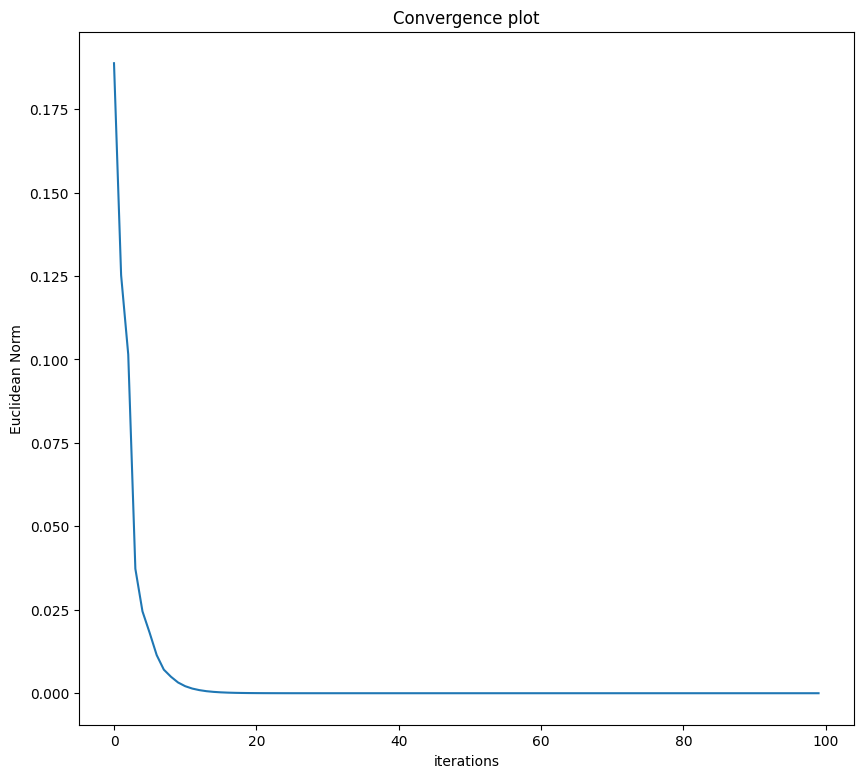


Pagerank importances..
[0.06543609 0.13072705 0.06315036 0.04920807 0.03537086 0.32805379
 0.32805379]


In [37]:
final_PageRank_score = run(M, 0.85,100)

In [38]:
#compare the result of the function from the NetworkX libary
compared_result = nx.pagerank(M,0.85)
print(compared_result)

{'A': 0.06543693487722958, 'B': 0.13072972919003592, 'C': 0.06315158949959036, 'D': 0.049208932543978484, 'E': 0.03537122838418331, 'F': 0.328050792752491, 'G': 0.328050792752491}


In [40]:
#sort the PageRank values
sorted_nodes, sorted_probs = sort_pagerank(final_PageRank_score, M)


Pagerank importances (sorted):
Node G: 0.32805379252335976
Node F: 0.32805379252335976
Node B: 0.1307270468232117
Node A: 0.06543608658000642
Node C: 0.06315035506074677
Node D: 0.049208068878503985
Node E: 0.03537085761081429
